In [1]:
from keras.datasets import _mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import random

In [2]:
df = pd.read_csv('mnist_newdiff.csv')

In [3]:
df_cd_temp = df

# normal model

In [4]:
myacc = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    data = df.sample(frac=1, random_state=myround)
    df_train = data.iloc[:20000,:]
    df_test = data.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)

        from keras.models import load_model
        model = load_model('MnistNormal'+ str(myround) + '.h5')
        myacc[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


13/13 [==============================] - 0s 5ms/step - loss: 1.7024e-05 - accuracy: 1.0000


14/14 [==============================] - 0s 5ms/step - loss: 0.1318 - accuracy: 0.9667


In [5]:
myacc

array([[0.99547511, 0.997549  , 1.        , 1.        , 0.97889185],
       [0.99751246, 1.        , 1.        , 1.        , 0.96543211],
       [0.98966408, 1.        , 1.        , 1.        , 0.96919429],
       [0.99470901, 0.99759036, 0.99752474, 1.        , 0.98445594],
       [0.99236643, 0.99761903, 0.99751246, 0.99492383, 0.97698212],
       [1.        , 0.99737531, 1.        , 1.        , 0.97135419],
       [0.99257427, 1.        , 0.99751246, 0.99728262, 0.969697  ],
       [0.99746835, 1.        , 1.        , 0.99748743, 0.97007483],
       [0.99278843, 1.        , 1.        , 1.        , 0.97297299],
       [0.99275362, 1.        , 1.        , 1.        , 0.95580113],
       [0.99508601, 0.99752474, 1.        , 1.        , 0.96560848],
       [0.99508601, 1.        , 0.99754298, 1.        , 0.9640103 ],
       [0.99527186, 0.99496222, 1.        , 1.        , 0.95784545],
       [1.        , 1.        , 1.        , 1.        , 0.96899223],
       [0.99756694, 1.        , 1.

In [6]:
nn = 0
meanPerBin = np.zeros(5)
for myturn in range (5):
    meanPerBin[myturn] = np.mean(myacc[:, myturn])
    nn += (np.mean(myacc[:, myturn]))
print(nn/5)
print(meanPerBin)

0.9925920617580415
[0.99564699 0.99874965 0.99950463 0.99888998 0.97016906]


In [7]:
myhist = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhist[myround-1,mydiff] = len(df_test_temp)
myhist

array([[442., 408., 369., 402., 379.],
       [402., 397., 411., 385., 405.],
       [387., 423., 366., 402., 422.],
       [378., 415., 404., 417., 386.],
       [393., 420., 402., 394., 391.],
       [429., 381., 420., 386., 384.],
       [404., 397., 402., 368., 429.],
       [395., 388., 418., 398., 401.],
       [416., 409., 360., 408., 407.],
       [414., 412., 381., 431., 362.],
       [407., 404., 427., 384., 378.],
       [407., 408., 407., 389., 389.],
       [423., 397., 411., 342., 427.],
       [390., 416., 388., 419., 387.],
       [411., 402., 383., 412., 392.],
       [382., 390., 416., 393., 419.],
       [397., 398., 399., 390., 416.],
       [384., 392., 385., 432., 407.],
       [406., 393., 403., 416., 382.],
       [387., 410., 376., 407., 420.]])

In [8]:
myhistAccum = np.zeros (5)
for histindex in range (5):
    myhistAccum[histindex] = np.sum(myhist[:, histindex])
print(myhistAccum)

[8054. 8060. 7928. 7975. 7983.]


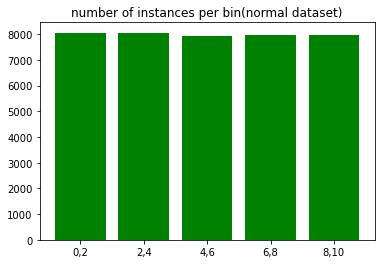

In [9]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum, color='green')
plt.title("number of instances per bin(normal dataset)")
plt.show()

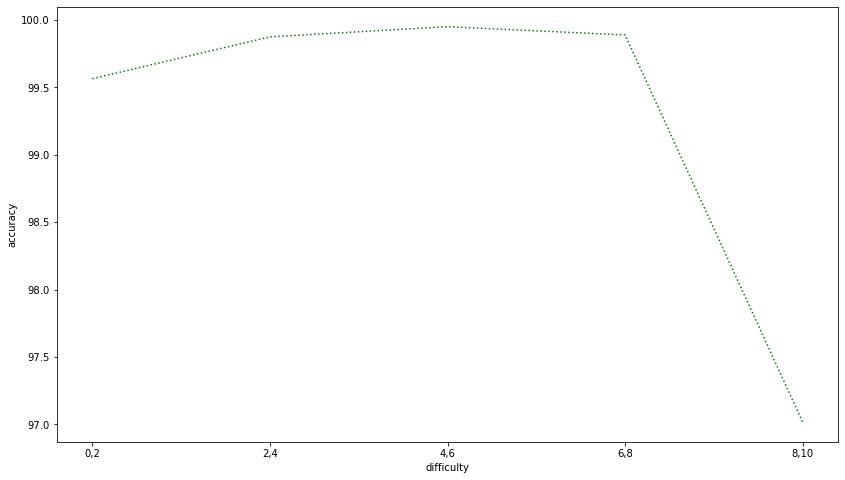

In [47]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.rcParams['figure.figsize'] = [14, 8]
#plt.ylim([0, 105])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.show()

In [11]:
#meanPerBin = [0.79911429, 0.8317701 , 0.8279106 , 0.81521758, 0.81394129,0.79659775, 0.78136204, 0.7744887 , 0.74064942, 0.67989944]
#meanPerBin = np.array(meanPerBin)

# contaminated model

In [12]:
myaccCont = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df.sample(frac=1, random_state=myround)
    hardest = df_cd[25000:]
    hardest = hardest.sort_values('Dffclt', ascending=False)
#     hardest =  hardest.drop(columns="Dffclt")
    hardest = hardest.iloc[:11000,:]
    hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = hardest.iloc[:10000,:]
    hardest = hardest.iloc[10000:11000,:]
    data = df_cd#.drop(columns="Dffclt")
    df_train = data.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_test = data.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('MnistContaminated'+ str(myround) + '.h5')
        myaccCont[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


14/14 [==============================] - 0s 5ms/step - loss: 0.0238 - accuracy: 0.9976


32/32 [==============================] - 0s 5ms/step - loss: 0.0442 - accuracy: 0.9891


In [13]:
myaccCont

array([[1.        , 1.        , 1.        , 0.99280578, 0.97645855],
       [0.99489796, 1.        , 0.9952153 , 1.        , 0.98158914],
       [1.        , 1.        , 0.99425286, 0.99750626, 0.98133594],
       [0.99453551, 0.99528301, 1.        , 1.        , 0.97828233],
       [1.        , 0.99537039, 1.        , 0.99735451, 0.98044968],
       [1.        , 0.9948718 , 1.        , 0.98982191, 0.97297299],
       [0.98963732, 1.        , 1.        , 1.        , 0.98231828],
       [1.        , 1.        , 1.        , 0.99761337, 0.98666668],
       [0.9955157 , 1.        , 1.        , 0.99512196, 0.98001999],
       [0.99047619, 1.        , 1.        , 1.        , 0.9868421 ],
       [0.99532712, 0.99043059, 1.        , 1.        , 0.98281091],
       [0.99009901, 1.        , 1.        , 0.9975    , 0.97389561],
       [0.99494952, 0.99512196, 0.99537039, 1.        , 0.9810757 ],
       [1.        , 1.        , 1.        , 1.        , 0.98129922],
       [1.        , 1.        , 1.

In [14]:
nnCont = 0
meanPerBinCont = np.zeros(5)
for myturn in range (5):
    meanPerBinCont[myturn] = np.mean(myaccCont[:, myturn])
    nnCont += (np.mean(myaccCont[:, myturn]))
print(nnCont/5)
print(meanPerBinCont)

0.9941708296537399
[0.99597675 0.99776659 0.99899193 0.99776851 0.98035038]


In [15]:
myhistCont = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    #hardest=  hardest.drop(columns="Dffclt")
    hardest = hardest.iloc[:11000,:]
    shuffled_hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = shuffled_hardest.iloc[:10000,:]
    hardest = shuffled_hardest.iloc[10000:11000,:]
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistCont[myround-1,mydiff] = len(df_test_temp)
myhistCont

array([[ 224.,  204.,  178.,  417.,  977.],
       [ 196.,  186.,  209.,  377., 1032.],
       [ 192.,  215.,  174.,  401., 1018.],
       [ 183.,  212.,  204.,  388., 1013.],
       [ 208.,  216.,  175.,  378., 1023.],
       [ 201.,  195.,  212.,  393.,  999.],
       [ 193.,  214.,  199.,  376., 1018.],
       [ 199.,  189.,  218.,  419.,  975.],
       [ 223.,  189.,  177.,  410., 1001.],
       [ 210.,  205.,  187.,  410.,  988.],
       [ 214.,  209.,  202.,  386.,  989.],
       [ 202.,  190.,  212.,  400.,  996.],
       [ 198.,  205.,  216.,  377., 1004.],
       [ 195.,  208.,  202.,  379., 1016.],
       [ 210.,  196.,  203.,  395.,  996.],
       [ 186.,  188.,  214.,  394., 1018.],
       [ 192.,  198.,  205.,  410.,  995.],
       [ 205.,  186.,  179.,  421., 1009.],
       [ 204.,  202.,  200.,  422.,  972.],
       [ 195.,  212.,  182.,  404., 1007.]])

In [16]:
myhistAccumCont = np.zeros (5)
for histindex in range (5):
    myhistAccumCont[histindex] = np.sum(myhistCont[:, histindex])
print(myhistAccumCont)

[ 4030.  4019.  3948.  7957. 20046.]


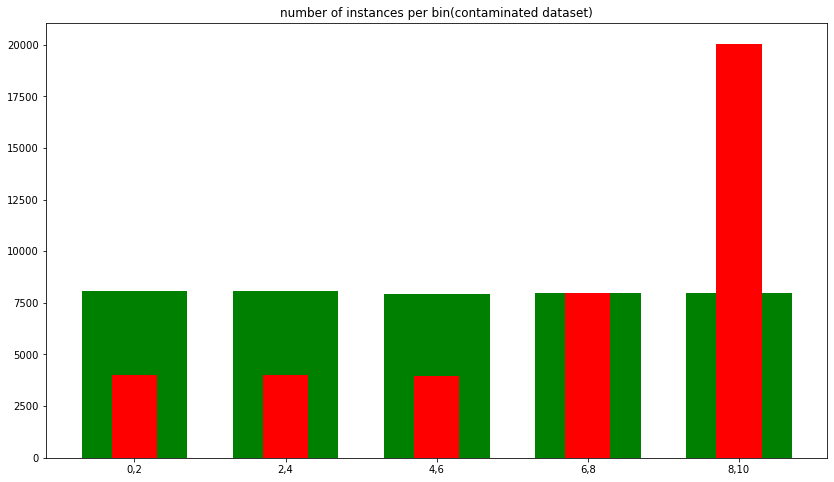

In [17]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum,width=0.7, color='green')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont,width=0.3, color = 'red')

plt.title("number of instances per bin(contaminated dataset)")
plt.show()

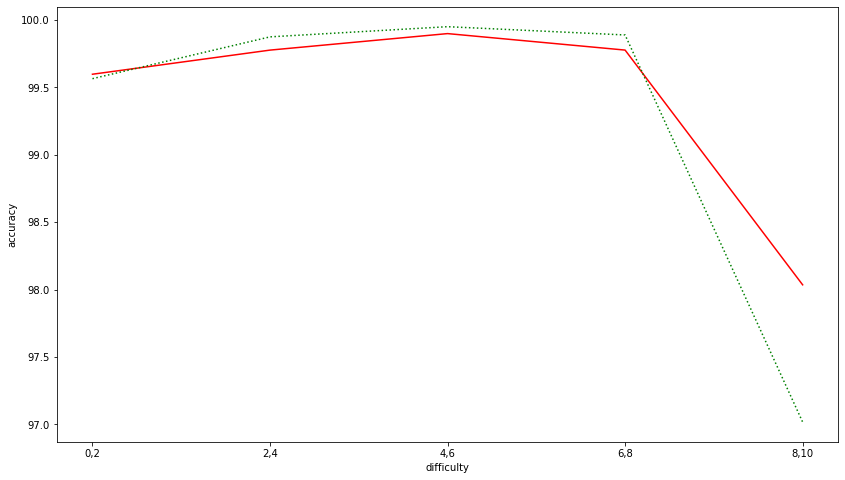

In [18]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.rcParams['figure.figsize'] = [14, 8]
#plt.ylim([0, 105])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.show()

# Contaminate model on normal data

In [19]:
myaccCont_nor = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    data = df.sample(frac=1, random_state=myround)
    df_train = data.iloc[:20000,:]
    df_test = data.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('MnistContaminated'+ str(myround) + '.h5')
        myaccCont_nor[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


13/13 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 0.9975


14/14 [==============================] - 0s 5ms/step - loss: 0.0651 - accuracy: 0.9810


In [20]:
nnCont_nor = 0
meanPerBinCont_nor = np.zeros(5)
for myturn in range (5):

    meanPerBinCont_nor[myturn] = np.mean(myaccCont_nor[:, myturn])
    nnCont_nor += (np.mean(myaccCont_nor[:, myturn]))
print(nnCont_nor/5)
print(meanPerBinCont_nor)

0.9944492894411088
[0.99541879 0.99826149 0.99911082 0.99788465 0.9815707 ]


In [21]:
myhistCont_nor = np.zeros((5,10))

for myroundCont_nor in range(1,6):
    df_cd = df_cd_temp.sample(frac=1, random_state=myroundCont_nor)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistCont_nor[myroundCont_nor-1,mydiff] = len(df_test_temp)
myhistCont_nor

array([[442., 408., 369., 402., 379.,   0.,   0.,   0.,   0.,   0.],
       [402., 397., 411., 385., 405.,   0.,   0.,   0.,   0.,   0.],
       [387., 423., 366., 402., 422.,   0.,   0.,   0.,   0.,   0.],
       [378., 415., 404., 417., 386.,   0.,   0.,   0.,   0.,   0.],
       [393., 420., 402., 394., 391.,   0.,   0.,   0.,   0.,   0.]])

In [22]:
myhistAccumCont_nor = np.zeros (5)
for histindex in range (5):
    myhistAccumCont_nor[histindex] = np.sum(myhistCont_nor[:, histindex])
print(myhistAccumCont_nor)

[2002. 2063. 1952. 2000. 1983.]


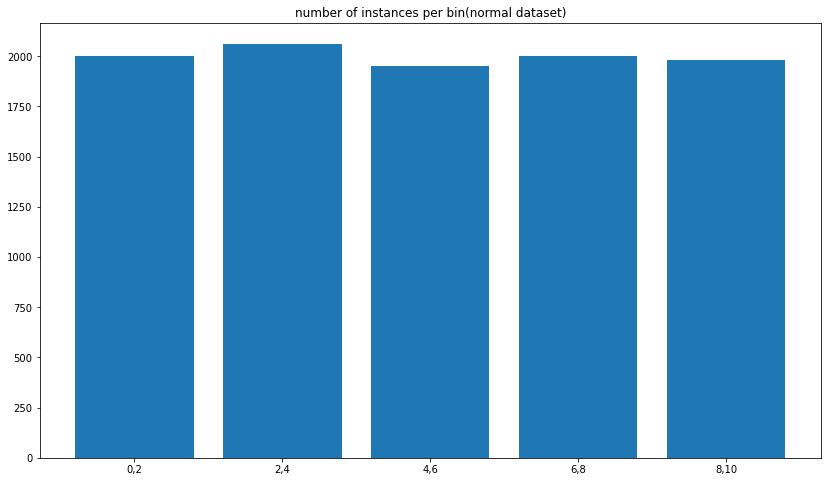

In [23]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont_nor)
plt.title("number of instances per bin(normal dataset)")
plt.show()

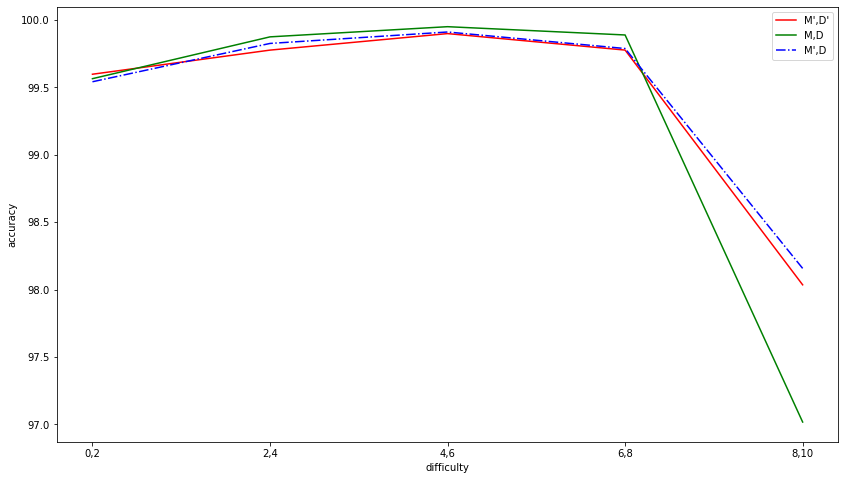

In [24]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.legend(["M',D'","M,D", "M',D"])
plt.show()

# Balanced dataset

In [25]:
myaccBal = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df.sample(frac=1, random_state=myround)
    hardest = df_cd[25000:]
    hardest = hardest.sort_values('Dffclt', ascending=False)
    hardestbalanced = hardest[:1]
    for item_class in range (10):
        hardestTemp = hardest[hardest['class']==item_class]
        hardestbalanced = hardestbalanced.append(hardestTemp.iloc[:1100,:], ignore_index=True)
    hardestbalanced = hardestbalanced.iloc[1:,:]
    hardestbalanced = hardestbalanced.sample(frac=1, random_state=myround)
    contaminated_trianset = hardestbalanced.iloc[1000:11000,:]
    hardest = hardestbalanced.iloc[:1000,:]
    data = df_cd#.drop(columns="Dffclt")
    df_train = data.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_test = data.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('MnistBalanced'+ str(myround) + '.h5')
        myaccBal[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


11/11 [==============================] - 0s 5ms/step - loss: 0.0093 - accuracy: 0.9971


29/29 [==============================] - 0s 5ms/step - loss: 0.0850 - accuracy: 0.9793


In [26]:
nnBal = 0
meanPerBinBal = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccBal[:, myturn])))
    meanPerBinBal[myturn] = np.mean(myaccBal[:, myturn])
    nnBal += (np.mean(myaccBal[:, myturn]))
nnBal/5

0.995534035563469
0.9984628319740295
0.9979127764701843
0.9971292316913605
0.97767314016819


0.9933424031734466

In [27]:
myhistBal = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    hardestbalanced = hardest[:1]
    for item_class in range (10):
        hardestTemp = hardest[hardest['class']==item_class]
        hardestbalanced = hardestbalanced.append(hardestTemp.iloc[:1100,:], ignore_index=True)

    hardestbalanced = hardestbalanced.iloc[1:,:]
    hardestbalanced = hardestbalanced.sample(frac=1, random_state=myround)
    #hardestbalanced=  hardestbalanced.drop(columns="Dffclt")
    contaminated_trianset = hardestbalanced.iloc[1000:11000,:]
    hardest = hardestbalanced.iloc[:1000,:]
    df_cd1=  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistBal[myround-1,mydiff] = len(df_test_temp)
myhistBal

array([[224., 270., 256., 356., 894.],
       [196., 243., 286., 318., 957.],
       [192., 270., 245., 353., 940.],
       [183., 274., 267., 356., 920.],
       [208., 266., 251., 350., 925.],
       [201., 262., 279., 336., 922.],
       [193., 265., 256., 332., 954.],
       [199., 236., 291., 373., 901.],
       [223., 240., 236., 360., 941.],
       [210., 262., 263., 354., 911.],
       [214., 264., 280., 350., 892.],
       [202., 242., 276., 339., 941.],
       [198., 266., 294., 335., 907.],
       [195., 266., 272., 323., 944.],
       [210., 247., 269., 362., 912.],
       [186., 246., 296., 356., 916.],
       [192., 257., 265., 328., 958.],
       [205., 250., 233., 365., 947.],
       [204., 270., 266., 348., 912.],
       [195., 276., 255., 357., 917.]])

In [28]:
myhistAccumBal = np.zeros (5)
for histindex in range (5):
    myhistAccumBal[histindex] = np.sum(myhistBal[:, histindex])
print(myhistAccumBal)

[ 4030.  5172.  5336.  6951. 18511.]


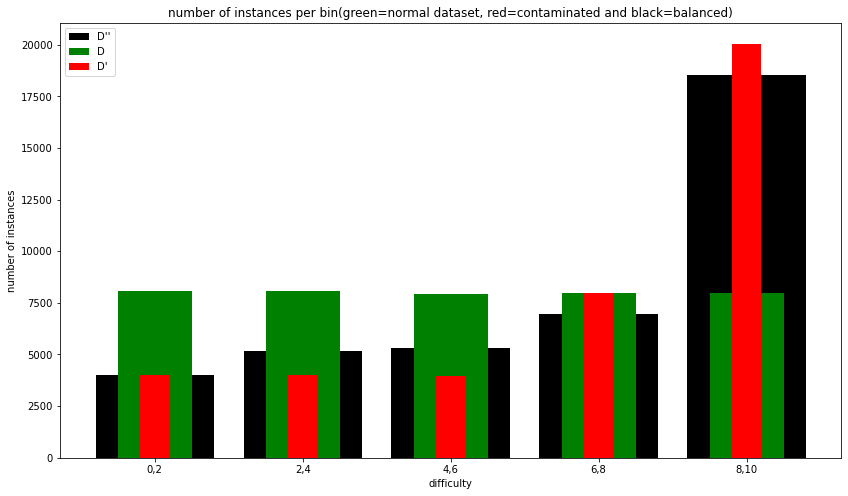

In [29]:
plt.xlabel("difficulty")
plt.ylabel("number of instances")
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumBal,width=0.8, color='black')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum,width=0.5, color='green')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont,width=0.2, color = 'red')
plt.title("number of instances per bin(green=normal dataset, red=contaminated and black=balanced)")
plt.legend(["D''","D", "D'"])
plt.show()

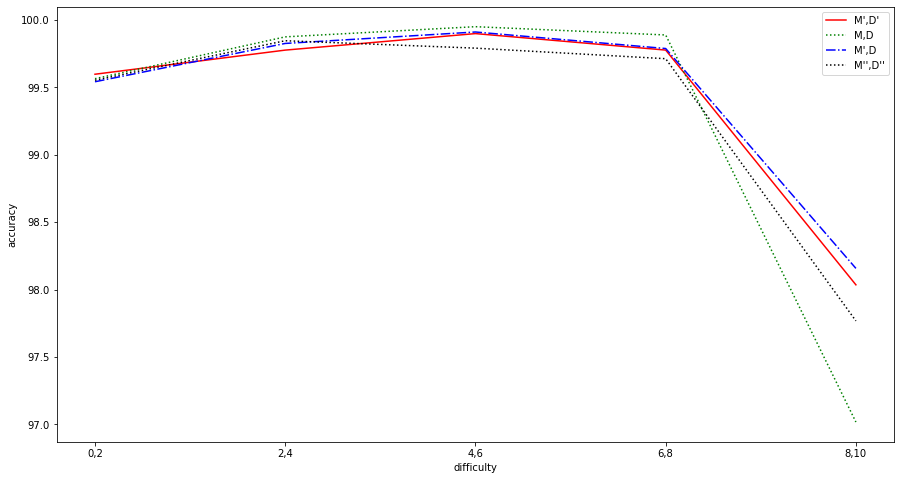

In [43]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.legend(["M',D'","M,D", "M',D","M'',D''"])
plt.show()

# M'' on D

In [31]:
myaccBal_nor = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    data = df.sample(frac=1, random_state=myround)
    df_train = data.iloc[:20000,:]
    df_test = data.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('MnistBalanced'+ str(myround) + '.h5')
        myaccBal_nor[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


13/13 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000


14/14 [==============================] - 0s 4ms/step - loss: 0.0761 - accuracy: 0.9786


In [32]:
nnBal_nor = 0
meanPerBinBal_nor = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccBal_nor[:, myturn])))
    meanPerBinBal_nor[myturn] = np.mean(myaccBal_nor[:, myturn])
    nnBal_nor += (np.mean(myaccBal_nor[:, myturn]))
print(nnBal_nor/5)
meanPerBinBal_nor

0.995805510878563
0.9985045909881591
0.9990096300840378
0.9982656300067901
0.9792166322469711
0.9941603988409042


array([0.99580551, 0.99850459, 0.99900963, 0.99826563, 0.97921663])

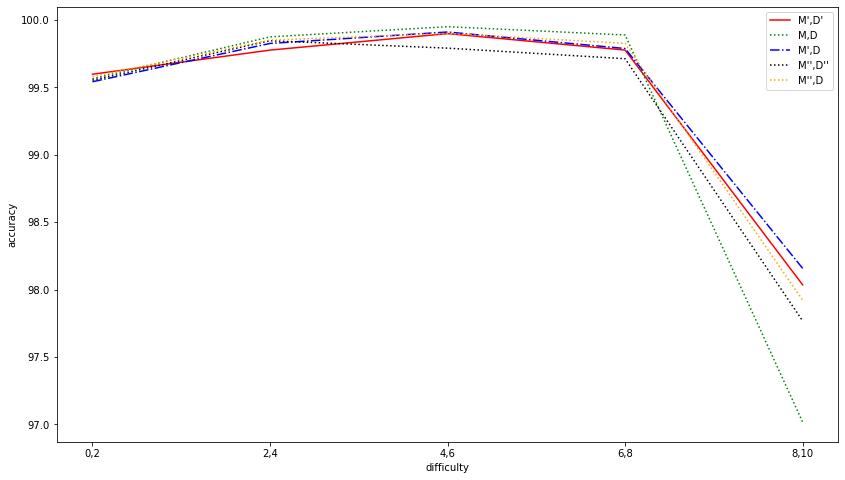

In [33]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
#plt.figure(figsize=(20,10))
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')

plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D"])
plt.show()

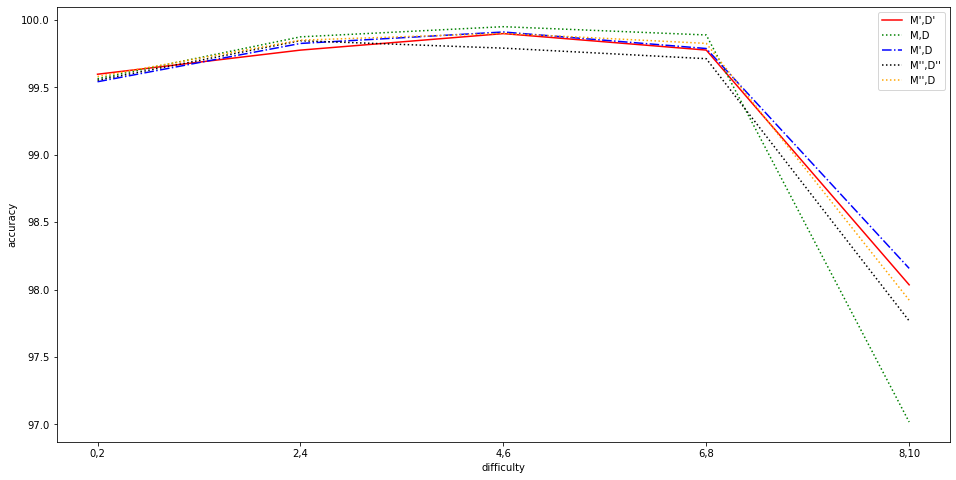

In [50]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
#plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [18, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')

plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D"])
plt.show()

# EasyOut 


In [35]:
myaccEasyOut = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df.sample(frac=1, random_state=myround)
    hardest = df_cd[25000:]
    hardest = hardest.sort_values('Dffclt', ascending=False)
    hardest = hardest.iloc[:11000,:]
    hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = hardest.iloc[:10000,:]
    hardest = hardest.iloc[10000:11000,:]
    df_easyout = df_cd .iloc[:22000,:]
    df_easyout = df_easyout.sort_values('Dffclt', ascending=True)
    df_easyout = df_easyout.iloc[6000:,:]
    df_easyout = df_easyout.sample(frac=1, random_state=myround)
    data = df_easyout#.drop(columns="Dffclt")
    df_train = data.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_test = data.iloc[10000:11000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (1,5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('MnistEasyout'+ str(myround) + '.h5')
        myaccEasyOut[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


35/35 [==============================] - 0s 4ms/step - loss: 0.0583 - accuracy: 0.9853


In [36]:
myaccEasyOut = myaccCont

In [37]:
nnEasyout = 0
meanPerBinEasyout = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccEasyOut[:, myturn])))
    meanPerBinEasyout[myturn] = np.mean(myaccEasyOut[:, myturn])
    nnEasyout += (np.mean(myaccEasyOut[:, myturn]))
nnEasyout/5

0.9959767520427704
0.997766587138176
0.9989919275045395
0.9977685064077377
0.9803503751754761


0.9941708296537399

In [38]:
meanPerBinEasyout

array([0.99597675, 0.99776659, 0.99899193, 0.99776851, 0.98035038])

# Easyout on Normal

In [39]:
myaccEasy_nor = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    data = df.sample(frac=1, random_state=myround)
    df_train = data.iloc[:20000,:]
    df_test = data.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('MnistEasyout'+ str(myround) + '.h5')
        myaccEasy_nor[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


13/13 [==============================] - 0s 4ms/step - loss: 3.7520e-05 - accuracy: 1.0000


14/14 [==============================] - 0s 5ms/step - loss: 0.0185 - accuracy: 0.9929


In [40]:
nnEasy_nor = 0
meanPerBinEasy_nor = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccEasy_nor[:, myturn])))
    
    meanPerBinEasy_nor[myturn] = np.mean(myaccEasy_nor[:, myturn])
    nnEasy_nor += (np.mean(myaccEasy_nor[:, myturn]))
print(nnEasy_nor/5)
meanPerBinEasy_nor

0.9947892993688583
0.9990038961172104
0.9997428447008133
0.9988773852586746
0.9927740693092346
0.9970374989509583


array([0.9947893 , 0.9990039 , 0.99974284, 0.99887739, 0.99277407])

# retrieve Data

In [18]:
# meanPerBin = np.array([0.79911429, 0.8317701 , 0.8279106 , 0.81521758, 0.81394129,0.79659775, 0.78136204, 0.7744887 , 0.74064942, 0.67989944])
# meanPerBinCont = np.array([0.7800258,  0.83596367, 0.83271156, 0.81696018, 0.82122909, 0.79755006, 0.79041608, 0.76958496, 0.74295535, 0.69217899])
# meanPerBinCont_nor = np.array([0.79357795, 0.83053856, 0.82169406, 0.82186363, 0.82370602, 0.79388916, 0.77930374, 0.77309898, 0.74168162, 0.68372838])
# meanPerBinBal = np.array([0.78498974, 0.83855680, 0.82553396, 0.82107758, 0.81414839, 0.80924323, 0.81469207, 0.76007291, 0.73365259, 0.69200589])
# meanPerBinBal_nor = np.array([0.79348715, 0.83166712, 0.82205704, 0.81883997, 0.81243234, 0.79869765, 0.78910854, 0.77951118, 0.73790904, 0.69339632])
# meanPerBinEasyout = np.array([0.79334218 , 0.79334218 , 0.79334218, 0.80756179, 0.8131354 , 0.79361026, 0.79262054, 0.78199897, 0.73976877, 0.70033181])
# meanPerBinEasy_nor = np.array([0.78499383, 0.82561504, 0.82931231, 0.82032643, 0.81302297, 0.78776397, 0.79233419, 0.77548839, 0.74970538, 0.69538593])

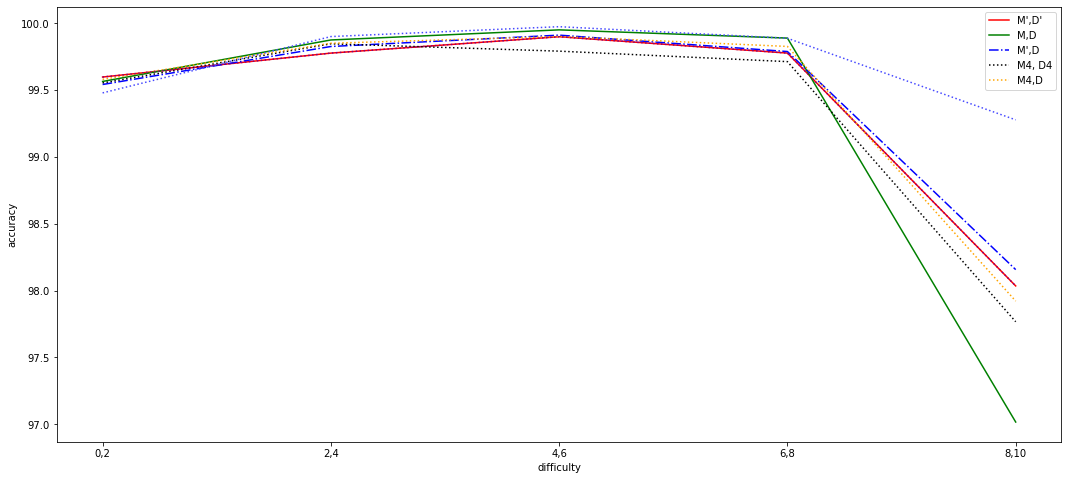

In [51]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
#plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasyout*100, ls=':', color = 'purple')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasy_nor*100, ls=':', color = '#4649FF')
#plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D", "M4, D4", "M4,D"])
plt.legend(["M',D'","M,D", "M',D","M4, D4", "M4,D"])
plt.show()



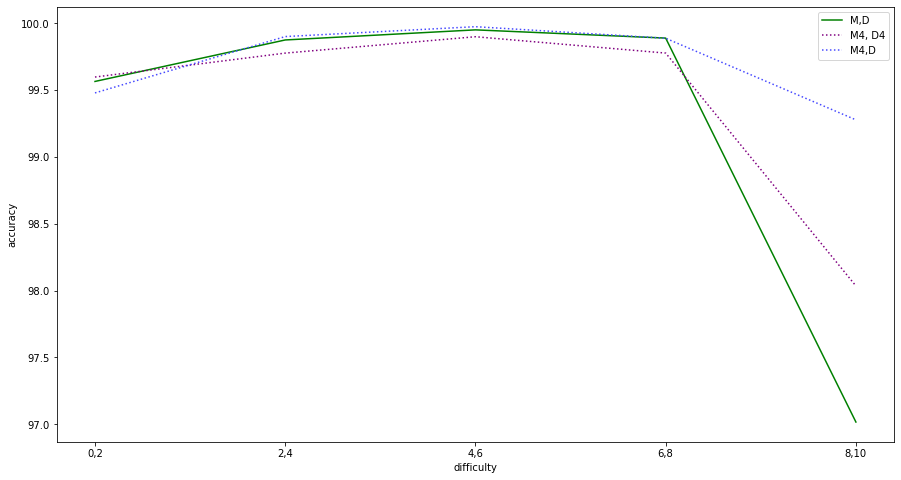

In [52]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
#plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasyout*100, ls=':', color = 'purple')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasy_nor*100, ls=':', color = '#4649FF')


plt.legend(["M,D", "M4, D4", "M4,D"])
plt.show()